In [166]:
from matplotlib import pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_rows', None)

In [167]:

def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

In [142]:
df = pd.read_csv('../Data/Team Data/Combined/league_stats.csv',index_col=0)
df.columns = [i.strip() for i in df.columns]
df.Team = df.Team.str.strip()
df = df.drop(df[df['Team'].str.contains('League')].index)

df.Team = df.Team.str.strip('*')

df = df.fillna(0)


df = df.reset_index(drop=True)

In [168]:
# df_test = df.drop(columns=['TEAM','SEASON','ARENA','ATTENDANCE','ATTENDANCE/G',])

feature_list = ['FG%','3P%','2P%', 'FT%','TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'Age', 'ORtg',
       'DRtg',  'Pace', 'FTr', '3PAr', 'TS%',]

In [145]:
X = df[feature_list]
y = df['W'].astype(float) / (df['W'].astype(float) + df['L'].astype(float))
y

0       0.743902
1       0.731707
2       0.719512
3       0.682927
4       0.670732
5       0.609756
6       0.597561
7       0.573171
8       0.500000
9       0.500000
10      0.475610
11      0.475610
12      0.463415
13      0.451220
14      0.451220
15      0.426829
16      0.414634
17      0.365854
18      0.365854
19      0.292683
20      0.292683
21      0.195122
22      0.756098
23      0.756098
24      0.731707
25      0.695122
26      0.658537
27      0.634146
28      0.609756
29      0.548780
30      0.548780
31      0.536585
32      0.487805
33      0.487805
34      0.475610
35      0.475610
36      0.451220
37      0.439024
38      0.414634
39      0.378049
40      0.341463
41      0.341463
42      0.292683
43      0.256098
44      0.768293
45      0.707317
46      0.695122
47      0.670732
48      0.634146
49      0.585366
50      0.560976
51      0.560976
52      0.560976
53      0.548780
54      0.536585
55      0.524390
56      0.512195
57      0.512195
58      0.4756

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# df.iloc[y_test.index].Year.unique()

In [165]:
# reg = LinearRegression().fit(X_train, y_train)
# dec_tree = tree.DecisionTreeClassifier().fit(X_train, y_train)
print('linear reg')
run_experiment(LinearRegression())
print('DecisionTree')
run_experiment(tree.DecisionTreeRegressor())
print('Random Forest')
run_experiment(RandomForestRegressor())

linear reg
R^2 :  0.9332420890306687
MAE : 0.03011921155307462
RMSE: 0.03808100956750123
DecisionTree
R^2 :  0.8415925248170474
MAE : 0.0457846456151319
RMSE: 0.058660386540585356
Random Forest
R^2 :  0.8978834234345976
MAE : 0.03631124198624665
RMSE: 0.04709829741561151


In [149]:
y_pred = reg.predict(X_test)

In [150]:

results = pd.DataFrame(y_test,columns=['Actual'])
results['Predicted'] = y_pred
results_view = df.iloc[results.index].loc[:,['Team','Year','W','L']]

results_view['Predicted'] = y_pred
results_view['Actual'] = results_view['W'].astype(float) / (results_view['W'].astype(float) + results_view['L'].astype(float))
results_view

,Team,Year,W,L,Predicted,Actual
31,Indiana Pacers,1981.0,44.0,38.0,0.536418,0.536585
832,Atlanta Hawks,2014.0,38.0,44.0,0.496708,0.463415
413,San Antonio Spurs,1997.0,20.0,62.0,0.256194,0.243902
1047,New York Knicks,2023.0,47.0,35.0,0.581247,0.573171
874,Atlanta Hawks,2016.0,48.0,34.0,0.618511,0.585366
622,New Jersey Nets,2006.0,49.0,33.0,0.555916,0.597561
582,Golden State Warriors,2004.0,37.0,45.0,0.486025,0.451220
581,New York Knicks,2004.0,39.0,43.0,0.471178,0.475610
86,Cleveland Cavaliers,1983.0,23.0,59.0,0.273647,0.280488
411,Golden State Warriors,1997.0,30.0,52.0,0.360535,0.365854


In [151]:
results_view['Predicted_W'] = round(results_view['Predicted'] * 82,0).astype(int)

In [152]:
results_view[['Team','Year','W','Predicted_W']].sort_values('W',ascending=False)

,Team,Year,W,Predicted_W
464,Vancouver Grizzlies,1999.0,8.0,18
365,Chicago Bulls,1996.0,72.0,74
390,Chicago Bulls,1997.0,69.0,72
790,Miami Heat,2013.0,66.0,64
590,Phoenix Suns,2005.0,62.0,59
88,Boston Celtics,1984.0,62.0,57
23,Boston Celtics,1981.0,62.0,55
741,San Antonio Spurs,2011.0,61.0,57
342,Utah Jazz,1995.0,60.0,63
542,Sacramento Kings,2003.0,59.0,59


In [226]:
win = list(df.W)
loss = list(df.L)

In [227]:
l = []
for i in range(len(win)):
    l.append(win[i]/(win[i]+loss[i]))

In [228]:
df['WIN%'] = l

In [229]:
df = df.drop(columns=['ARENA','ATTENDANCE','ATTENDANCE/G','TEAM','SEASON'])

Text(0, 0.5, 'Second Principal Component')

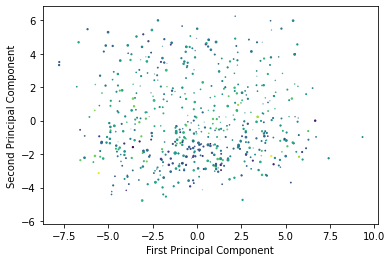